<a href="https://colab.research.google.com/github/dprugby/CIFAR10-without-convolutions/blob/master/CIFAR10_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10: shallow vs. (deep) dense neural networks**

## Loading and preprocessing the data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Load the data and inspect image shapes
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


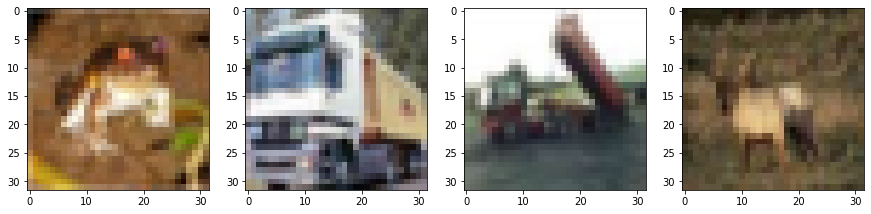

In [ ]:
# Let's have a look at the images. In many cases, they are not discernible by human eye!
import pylab as plt
_, axarr = plt.subplots(1,4, figsize=(15, 15)) 
axarr[0].imshow(X_train[0])
axarr[1].imshow(X_train[1])
axarr[2].imshow(X_train[2])
axarr[3].imshow(X_train[3])
plt.show()

## Deep dense NN: 20 hidden layers + batch normalization + dropout


### Tuning the learning rate

In [ ]:
# assemble the model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization()) # initial normalization of the data
for _ in range(20):
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(128, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_test, y_test), batch_size=128, callbacks=[lr_schedule])

Epoch 1/120
391/391 [==============================] - 11s 29ms/step - loss: 2.5704 - accuracy: 0.0994 - val_loss: 2.3343 - val_accuracy: 0.0847 - lr: 1.0000e-04
Epoch 2/120
391/391 [==============================] - 11s 28ms/step - loss: 2.5252 - accuracy: 0.1018 - val_loss: 2.3271 - val_accuracy: 0.0874 - lr: 1.1220e-04
Epoch 3/120
391/391 [==============================] - 11s 28ms/step - loss: 2.5061 - accuracy: 0.1023 - val_loss: 2.3215 - val_accuracy: 0.0899 - lr: 1.2589e-04
Epoch 4/120
391/391 [==============================] - 11s 28ms/step - loss: 2.4864 - accuracy: 0.1037 - val_loss: 2.3209 - val_accuracy: 0.0923 - lr: 1.4125e-04
Epoch 5/120
391/391 [==============================] - 11s 28ms/step - loss: 2.4713 - accuracy: 0.1026 - val_loss: 2.3199 - val_accuracy: 0.0977 - lr: 1.5849e-04
Epoch 6/120
391/391 [==============================] - 11s 28ms/step - loss: 2.4537 - accuracy: 0.1037 - val_loss: 2.3194 - val_accuracy: 0.1002 - lr: 1.7783e-04
Epoch 7/120
391/391 [=======

This takes about 22 minutes. Now plot learning rate vs loss.

(0.0001, 10.0, 0.0, 3.0)

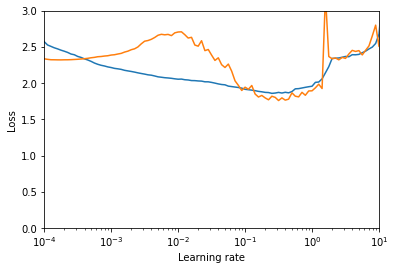

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"])
plt.semilogx(history.history["lr"], history.history["val_loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.axis([1e-4, 10, 0, 3])

### Fitting with the optimal lr

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.07, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/250
391/391 [==============================] - 11s 27ms/step - loss: 1.4361 - accuracy: 0.4980 - val_loss: 1.4319 - val_accuracy: 0.5040
Epoch 2/250
391/391 [==============================] - 11s 27ms/step - loss: 1.4221 - accuracy: 0.5054 - val_loss: 1.4282 - val_accuracy: 0.5040
Epoch 3/250
391/391 [==============================] - 11s 27ms/step - loss: 1.4169 - accuracy: 0.5021 - val_loss: 1.4207 - val_accuracy: 0.5144
Epoch 4/250
391/391 [==============================] - 11s 27ms/step - loss: 1.4187 - accuracy: 0.5064 - val_loss: 1.4373 - val_accuracy: 0.5037
Epoch 5/250
391/391 [==============================] - 11s 28ms/step - loss: 1.4204 - accuracy: 0.5013 - val_loss: 1.4203 - val_accuracy: 0.5049
Epoch 6/250
391/391 [==============================] - 11s 27ms/step - loss: 1.4208 - accuracy: 0.5028 - val_loss: 1.4342 - val_accuracy: 0.5049
Epoch 7/250
391/391 [==============================] - 11s 27ms/step - loss: 1.4143 - accuracy: 0.5041 - val_loss: 1.4256 - val_ac

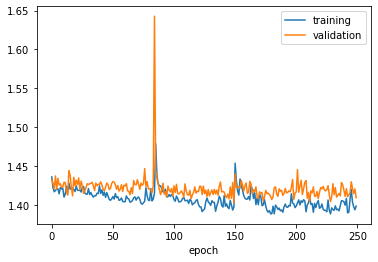

In [ ]:
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

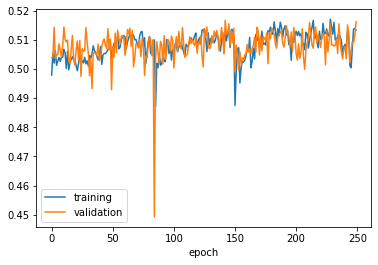

In [ ]:
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

The above model has been pretrained to reach 50 - 51 % accuracy. This has not really imroved for the last 250 epochs, as seen from the graphs. Let us save the model and move on. 

In [ ]:
model.save('deep_network.h5')
from google.colab import files
files.download("deep_network.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## How well can a single-hidden-layer neural network do?

### Tuning the learning rate

In [ ]:
# this is a shallow network -- we do not need batchnorm, but we still need to rescale the input images
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# now assemble the model (we choose the size of the hidden layer as (n_input + n_output)/2)
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1541, activation="relu", kernel_regularizer=keras.regularizers.l2(0.05), kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 1541)              4735493   
_________________________________________________________________
dense_64 (Dense)             (None, 10)                15420     
Total params: 4,750,913
Trainable params: 4,750,913
Non-trainable params: 0
_________________________________________________________________


This has many more parameters than the previous, deep model. Try learning rate scheduling:

In [ ]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_test, y_test), batch_size=128, callbacks=[lr_schedule])

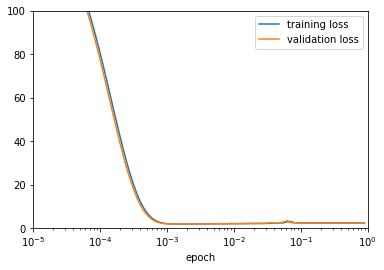

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"],label="training loss")
plt.semilogx(history.history["lr"], history.history["val_loss"],label="validation loss")
plt.xlabel("epoch")
plt.legend()
plt.axis([1e-5, 1, 0, 100])
plt.show()

### Fitting with the optimal learning rate

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# now assemble the model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1541, activation="relu", kernel_regularizer=keras.regularizers.l2(0.05), kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=2e-4, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), batch_size=128)

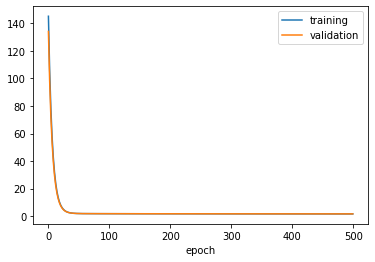

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

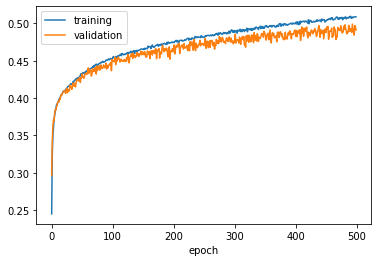

In [ ]:
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
model.save('1_hid_layer.h5')
from google.colab import files
files.download("1_hid_layer.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2 hidden layers

In [ ]:
# rescale the data
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# now assemble the model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(1024, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(512, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [ ]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=128, callbacks=[lr_schedule])

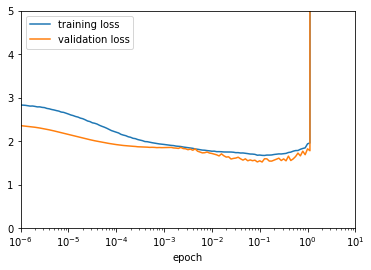

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"],label="training loss")
plt.semilogx(history.history["lr"], history.history["val_loss"],label="validation loss")
plt.xlabel("epoch")
plt.legend()
plt.axis([1e-6, 1e1, 0, 5])
plt.show()

## Fitting with Adam optimizer

In [ ]:
# this is a shallow network -- we do not need batchnorm, but we still need to rescale the input images
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# now assemble the model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(1024, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(512, kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
optimizer = tf.keras.optimizers.Adam() #SGD(lr=1e-4, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), batch_size=128)

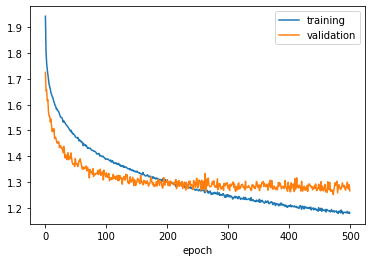

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

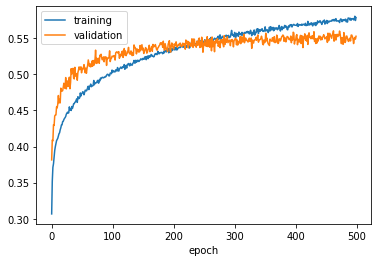

In [ ]:
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
model.save('2_hid_layer.h5')
from google.colab import files
files.download("2_hid_layer.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>